## Key Steps in Building a Machine Learning Model (Fertilizer Recommendation System)

1. **Data Collection**  
   - Load dataset (e.g., CSV from Kaggle or other sources).

2. **EDA & Preprocessing**  
   - Exploratory Data Analysis (EDA): Understand feature distributions, correlations.  
   - Preprocessing: Handle missing values, normalize/scale data, encode if necessary.

3. **Model Selection & Training**  
   - Choose appropriate algorithms (e.g., Random Forest, SVM, KNN).  
   - Train models using the training data.

4. **Model Evaluation**  
   - Use metrics like accuracy, precision, recall, F1-score on test data.

5. **Prediction & Saving the Model**  
   - Make predictions on new data.  
   - Save the model using `joblib` or `pickle` for later use/deployment.


In [1]:
#starting with the crop and fertiliser recommendation system

## Data collection

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the csv file and converting it into a dataframe
fertilizer=pd.read_csv('fertilizer file.csv')

In [4]:
fertilizer.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [6]:
#onlu numerical columns will be shown not the categorical ones
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
#checking the basic information of the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [8]:
fertilizer.shape

(99, 9)

In [9]:
#checking for any missing values in the dataset
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [10]:
#checking for any duplicated values in the dataset
fertilizer.duplicated().sum()

0

## Exploring the data (EDA)

plotting the charts

In [11]:
# Bar chart

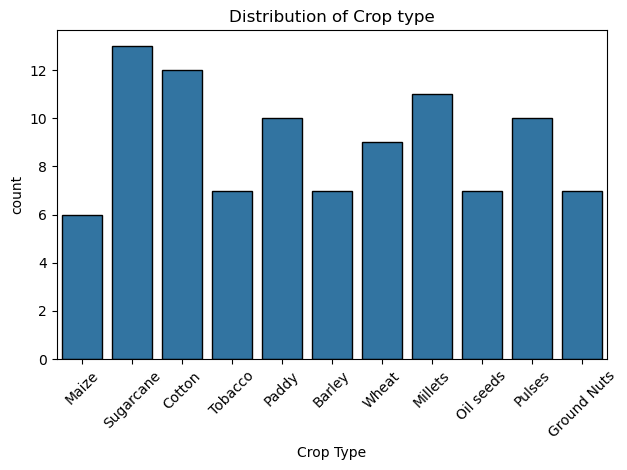

In [16]:
#purpose : to understand hwo many entries exist for each crop type
# this helps in identifying whether the dataset is balanced or not

sns.countplot(data=fertilizer, x='Crop Type', edgecolor='black') #creates a bar chart showing count of occurrences
# of each category in a  categorical column
plt.title("Distribution of Crop type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# histplot


In [21]:
fertilizer['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

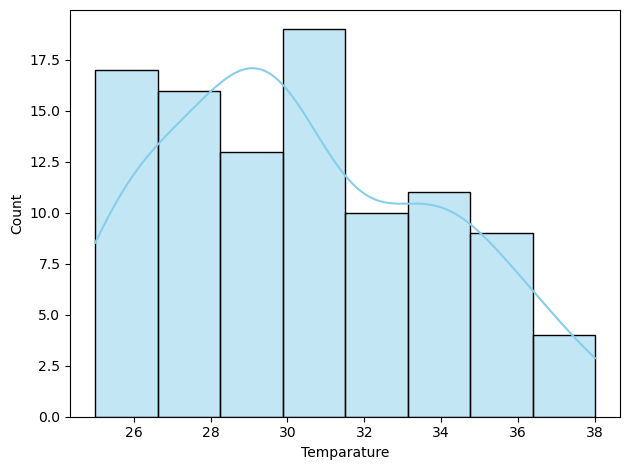

In [26]:
# Histograms show how values are spread (e.g., whether they are skewed, clustered, or uniform).
# This helps us detect patterns, anomalies, and potential preprocessing needs like normalization.
# checking the distribution of the temperture column

sns.histplot(fertilizer['Temparature'], kde=True, edgecolor='black', color='skyblue')
plt.tight_layout()
plt.show()

In [32]:
#finding the correlation matrix
#selecting only the numerical columns
# and storing them in a dataframe

fertilizer_numeric=fertilizer.select_dtypes(include=[np.number])
corr=fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


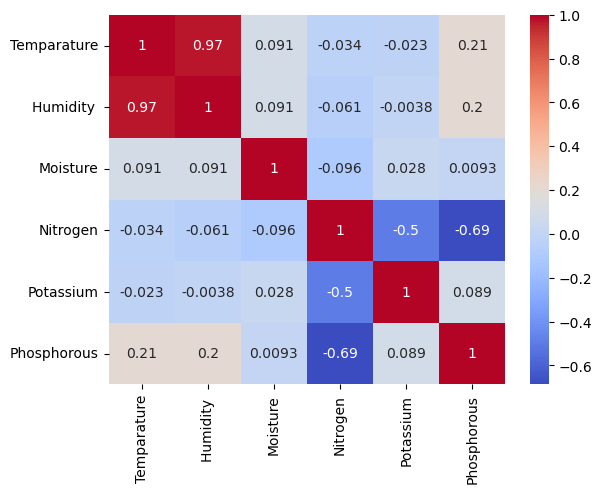

In [33]:
#making a heatmap of the same
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')
plt.show()

In [35]:
#selecting only the numerical columns
features=fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


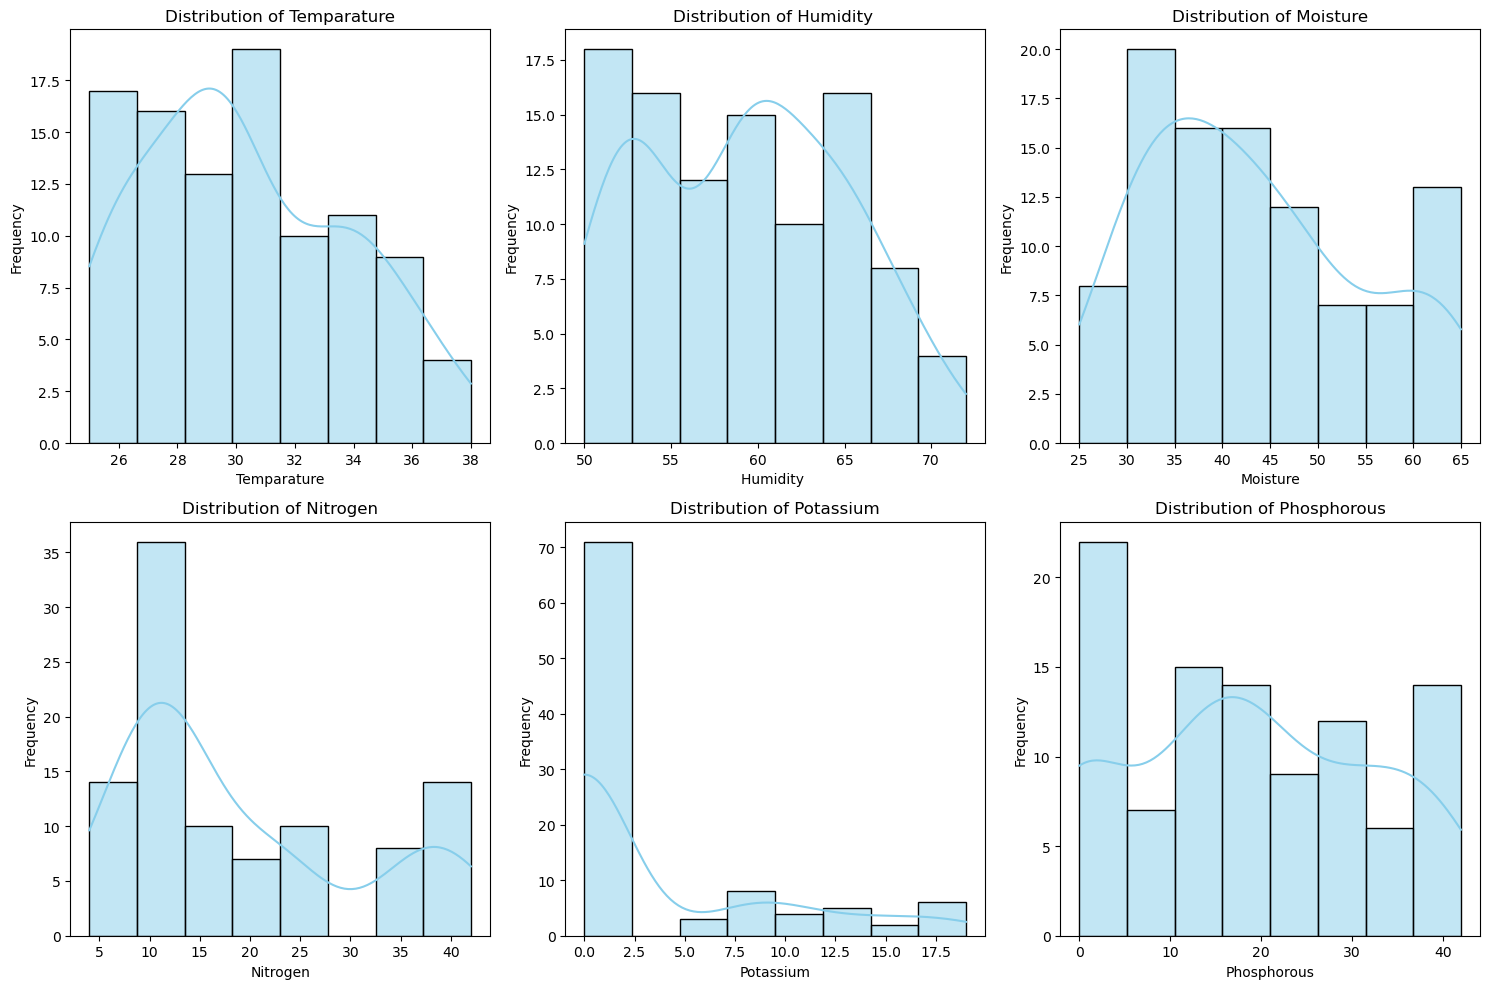

In [37]:
# visualizing the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Loop through each feature and corresponding subplot axis
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True, color='skyblue', edgecolor='black')
    
    # Set title and axis labels for clarity
    subplot.set_title(f'Distribution of {i}')
    subplot.set_xlabel(i)
    subplot.set_ylabel('Frequency')


plt.tight_layout()
plt.show()